In [14]:
import numpy as np
import random as rd
import networkx as nx #to plt the graph
from matplotlib import pyplot as plt
from copy import deepcopy as deepcopy

In [15]:
data = {}

data['tijk'] = [ #tijk
    [0, 6, 9, 8, 7, 3, 6, 2, 3, 2, 6, 6, 4, 4, 5, 9, 7],                 #0
    [6, 0, 8, 3, 2, 6, 8, 4, 8, 8, 13, 7, 5, 8, 12, 10, 14],             #1 
    [9, 8, 0, 11, 10, 6, 3, 9, 5, 8, 4, 15, 14, 13, 9, 18, 9],           #2
    [8, 3, 11, 0, 1, 7, 10, 6, 10, 10, 14, 6, 7, 9, 14, 6, 16],          #3   
    [7, 2, 10, 1, 0, 6, 9, 4, 8, 9, 13, 4, 6, 8, 12, 8, 14],             #4
    [3, 6, 6, 7, 6, 0, 2, 3, 2, 2, 7, 9, 7, 7, 6, 12, 8],                #5
    [6, 8, 3, 10, 9, 2, 0, 6, 2, 5, 4, 12, 10, 10, 6, 15, 5],            #6
    [2, 4, 9, 6, 4, 3, 6, 0, 4, 4, 8, 5, 4, 3, 7, 8, 10],                #7
    [3, 8, 5, 10, 8, 2, 2, 4, 0, 3, 4, 9, 8, 7, 3, 13, 6],               #8
    [2, 8, 8, 10, 9, 2, 5, 4, 3, 0, 4, 6, 5, 4, 3, 9, 5],                #9
    [6, 13, 4, 14, 13, 7, 4, 8, 4, 4, 0, 10, 9, 8, 4, 13, 4],            #10
    [6, 7, 15, 6, 4, 9, 12, 5, 9, 6, 10, 0, 1, 3, 7, 3, 10],             #11
    [4, 5, 14, 7, 6, 7, 10, 4, 8, 5, 9, 1, 0, 2, 6, 4, 8],               #12
    [4, 8, 13, 9, 8, 7, 10, 3, 7, 4, 8, 3, 2, 0, 4, 5, 6],               #13
    [5, 12, 9, 14, 12, 6, 6, 7, 3, 3, 4, 7, 6, 4, 0, 9, 2],              #14
    [9, 10, 18, 6, 8, 12, 15, 8, 13, 9, 13, 3, 4, 5, 9, 0, 9],           #15
    [7, 14, 9, 16, 14, 8, 5, 10, 6, 5, 4, 10, 8, 6, 2, 9, 0],            #16
]

data['time_windows'] = [
   #(ai, bi)
    (0, 100),  # i = o(k)
    (0, 100),  # i = 1
    (0, 100),  # i = 2
    (0, 100),  # i = 3
    (0, 100),  # i = 4
    (0, 100),  # i = 5
    (0, 100),  # i = 6
    (0, 100),  # i = 7
    (0, 100),  # i = 8
    (0, 100),  # i = 9
    (0, 100),  # i = 10
    (0, 100),  # i = 11
    (0, 100),  # i = 12
    (0, 100),  # i = 13
    (0, 100),  # i = 14
    (0, 100),  # i = 15
    (0, 100),  # i = 16
]
data['pickups_deliveries'] = [
    [1, 6],
    [2, 10],
    [4, 3],
    [5, 9],
    [7, 8],
    [15, 11],
    [13, 12],
    [16, 14],
]
data['k'] = 1  #k: num vehicule 

data['o(k)'] = 0 # o(k) origin

data['P'] = []
for j in range(len(data['pickups_deliveries'])):
    data['P'].append(data['pickups_deliveries'][j][0])

data['D'] = []
for j in range(len(data['pickups_deliveries'])):
    data['D'].append(data['pickups_deliveries'][j][1])

data['K'] = np.arange(1, data['k'] + 1)

data['Tik'] = np.zeros((17, data['k']))



In [16]:
s0 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16] 

In [17]:
def solutionRate(s0, tijk):
    N = len(s0)
    output = 0
    for i in range(N-1):
        output += tijk[(s0[i])][(s0[i+1])]
    return float(output/N-1)

In [18]:
solutionRate(s0, data['tijk'])

4.0588235294117645

In [19]:
def generate(s):
    return np.random.permutation(s)

In [20]:
def improveSolution(niter,s0, generate, tijk,T):
    s = deepcopy(s0)
    rate = solutionRate(s,tijk)
    rates = [rate]
    for n in range(niter):
        setoile = generate(s)
        if setoile[0] == 0:
            delta = solutionRate(setoile,tijk) - rate
            if  delta < 0:
                s = setoile
                rate = solutionRate(s,tijk)
            else:
                a = rd.random()
                if a < np.exp(-delta/T(n)):
                    s = setoile
                    rate = solutionRate(s,tijk)
            rates.append(rate)
    return s,rates

In [21]:
def simulatedAnnealing(s0, niter, tijk, Temperature, N):
    s_sim, rate_sim = improveSolution(niter, s0,generate,tijk,Temperature)
    rates = rate_sim[-1]
    return s_sim, rates


In [22]:
def Temp(n,alpha=.6):
    return max(100 *  (alpha**(n+1)), 10**(-18))

In [23]:
test = simulatedAnnealing(s0, 100000, data['tijk'], Temp, data['P'] + data['D'])

In [24]:
print(test)

(array([ 0,  1,  4,  3, 11, 13,  9, 14, 16, 12, 15,  7,  6,  8,  2,  5, 10]), 3.2941176470588234)


In [25]:
def visual(G, k):
    g = nx.Graph() 
    for k in range (data['k']):  
        for i in range(len(G[k]) - 1):
            g.add_edge(G[k][i], G[k][i+1]) 
    nx.draw_circular(g, with_labels = True, edge_color='r') 

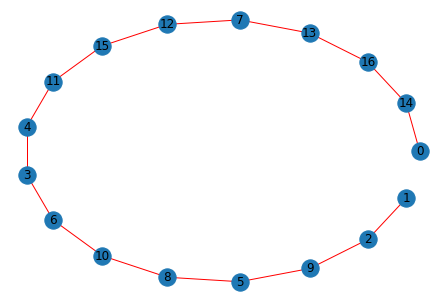

In [13]:
visual(test, data['k'])